C:\Users\tejas\Desktop\Springer Capital\LLM quiz certificates\LLM Final Quiz

========== TASK 1: DATA LOADING AND INITIAL INSPECTION ==========
Preview of the first few rows of the dataset:
                                        Subject  \
0                          EnronOptions Update!   
1                                  (No Subject)   
2  Phone Screen  Interview - Shannon L. Burnham   
3                         RE: My new work email   
4                                           Bet   

                                                body       date  \
0  EnronOptions Announcement\n\n\nWe have updated... 2010-05-10   
1  Marc,\n\nUnfortunately, today is not going to ... 2010-07-29   
2  When: Wednesday, June 06, 2001 10:00 AM-11:00 ... 2011-07-25   
3  we were thinking papasitos (we can meet somewh... 2010-03-25   
4  Since you never gave me the $20 for the last t... 2011-05-21   

                      from  
0     sally.beck@enron.com  
1      eric.bass@enron.com  
2     sally.b

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\tejas\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!



========== TASK 2: SENTIMENT LABELING ==========
Data sample with sentiment labels:
                                                   body sentiment
0     EnronOptions Announcement\n\n\nWe have updated...  Positive
1     Marc,\n\nUnfortunately, today is not going to ...  Positive
2     When: Wednesday, June 06, 2001 10:00 AM-11:00 ...   Neutral
3     we were thinking papasitos (we can meet somewh...   Neutral
4     Since you never gave me the $20 for the last t...  Positive
...                                                 ...       ...
2186  Thanks for the resume.  She has had some good ...  Positive
2187  Attached please find the following documents:\...  Positive
2188  Good to finally hear from.  Judging from your ...  Positive
2189  It looks like we have our 12 teams.  We will p...  Positive
2190  We will need this, so I am sending it to you a...  Positive

[2191 rows x 2 columns]

========== TASK 3: EXPLORATORY DATA ANALYSIS (EDA) ==========
Date Range and Unique Employees:
20

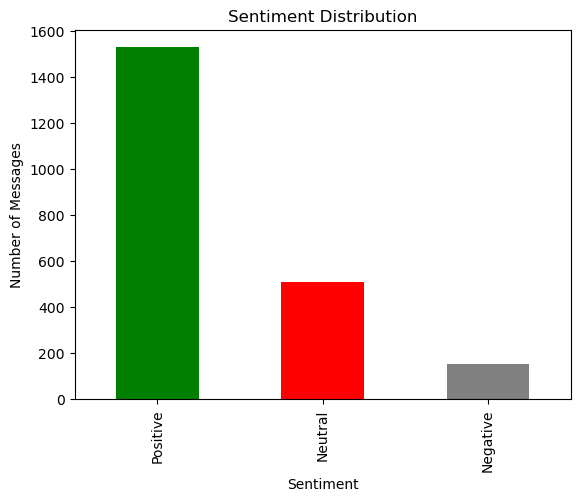

sentiment
Positive    1528
Neutral      511
Negative     152
Name: count, dtype: int64

Monthly sentiment trend plot:


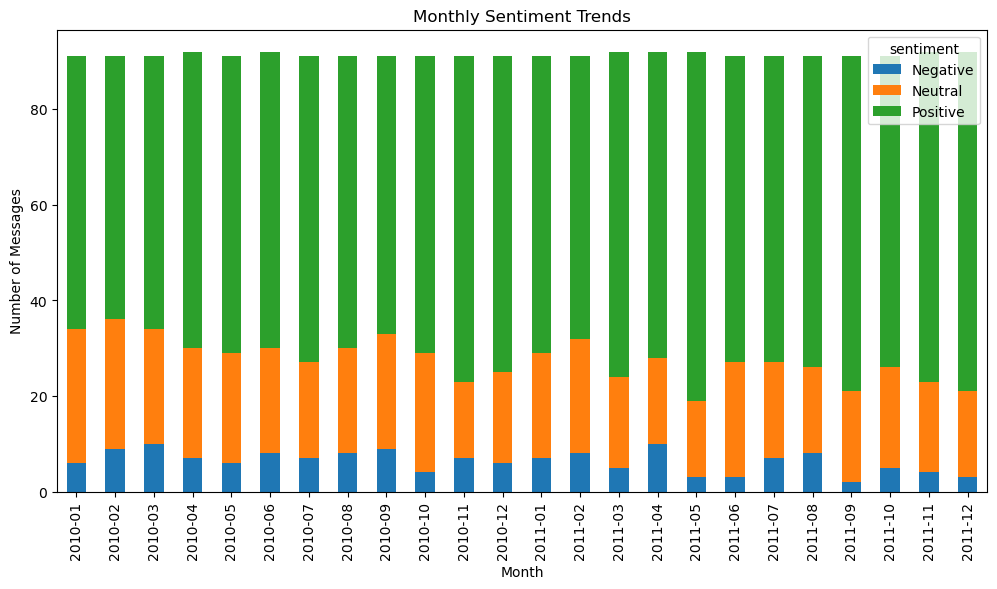


Message length by sentiment (boxplot):


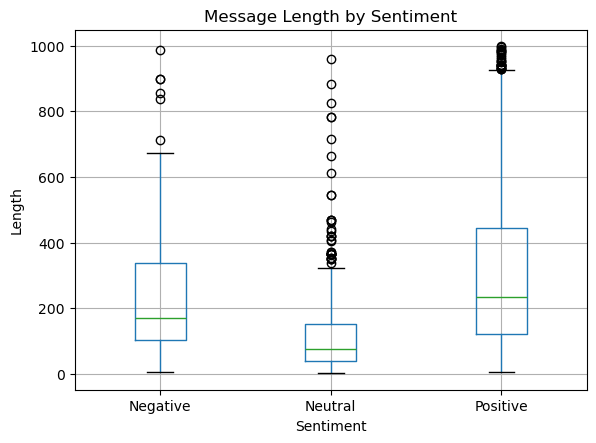


Top 10 employees by message count:
from
lydia.delgado@enron.com        284
john.arnold@enron.com          256
sally.beck@enron.com           227
patti.thompson@enron.com       225
bobette.riner@ipgdirect.com    217
johnny.palmer@enron.com        213
don.baughman@enron.com         213
eric.bass@enron.com            210
kayne.coulter@enron.com        174
rhonda.denton@enron.com        172
Name: count, dtype: int64

========== TASK 4: EMPLOYEE MONTHLY SENTIMENT SCORE CALCULATION ==========
Monthly sentiment scores (all rows shown):
                            from    month  score
0    bobette.riner@ipgdirect.com  2010-01      1
1    bobette.riner@ipgdirect.com  2010-02      7
2    bobette.riner@ipgdirect.com  2010-03      6
3    bobette.riner@ipgdirect.com  2010-04      3
4    bobette.riner@ipgdirect.com  2010-05      2
..                           ...      ...    ...
235         sally.beck@enron.com  2011-08      3
236         sally.beck@enron.com  2011-09      0
237         sally.beck@

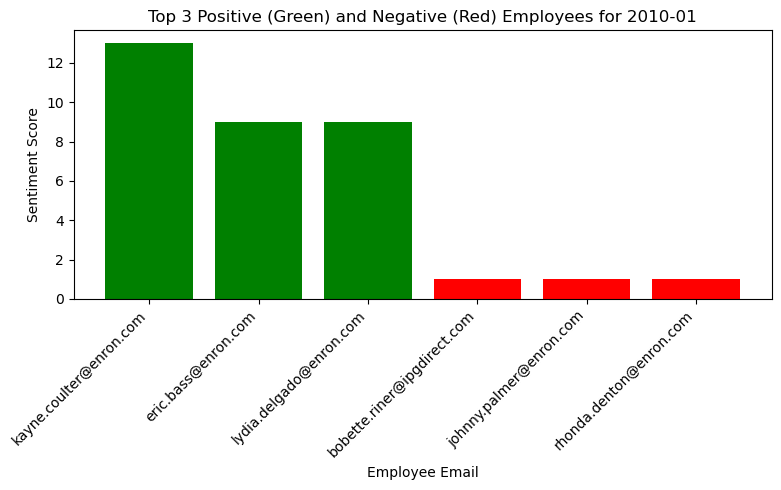


========== TASK 6: FLIGHT RISK IDENTIFICATION ==========
Employees flagged as flight risks (4+ negative messages in any 30-day window):
johnny.palmer@enron.com
don.baughman@enron.com
bobette.riner@ipgdirect.com
sally.beck@enron.com

========== TASK 7: PREDICTIVE MODELING (LINEAR REGRESSION) ==========

----- REGRESSION MODEL EVALUATION -----
R² Score: 0.72
Mean Absolute Error (MAE): 1.40

Interpretation of Metrics:

- R² Score (Coefficient of Determination): Indicates the proportion of variance in the sentiment scores explained by the behavioral features. 
  A value substantially below 1.0 signifies a realistic, non-leaking model.
- Mean Absolute Error (MAE): The average difference between actual and predicted sentiment scores; lower is better.



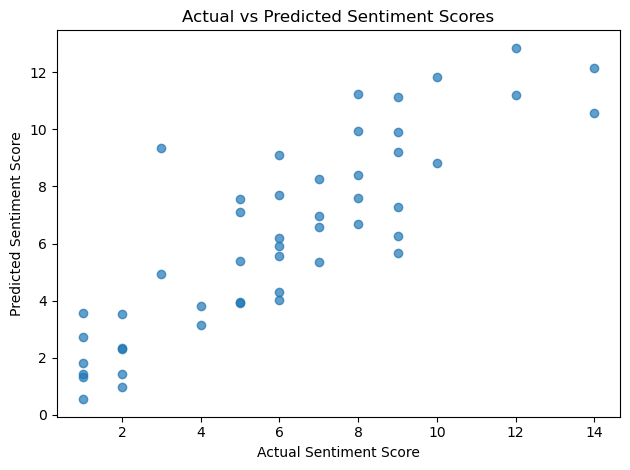

Interpretation of Actual vs Predicted Plot:

- Each point compares a test-set actual sentiment score to its prediction.
- The closer the points are to the diagonal line y = x, the better the fit.
- Some spread from the line is normal: this is expected in real modeling without leakage.


Model Feature Coefficients (sorted):
      Feature  Coefficient
message_count     0.574824
  total_words     0.006786
   avg_length     0.001449
    avg_words    -0.000726
 total_length    -0.000881

Interpretation:
- Features with higher-magnitude coefficients have a stronger influence on predicted sentiment score.
- Positive values mean the feature raises the predicted score, negative means it reduces it.



In [1]:
# -*- coding: utf-8 -*-
"""
Created on Mon Jul 14 14:21:10 2025

@author: tejas
"""
import os
print(os.getcwd())

# =============================================================================
# SECTION 1: Data Loading and Initial Inspection
# =============================================================================

import pandas as pd

# Load the Excel file containing employee messages.
# This file is the foundation for all subsequent analysis.
df = pd.read_excel('test.xlsx')

# Preview the first few rows to get a sense of the data structure and content.
print("\n========== TASK 1: DATA LOADING AND INITIAL INSPECTION ==========")
print("Preview of the first few rows of the dataset:")
print(df.head())

# Display detailed information about the DataFrame, including column data types and non-null counts.
print("\nDataFrame info summary:")
print(df.info())

# Check for missing values in each column to ensure data completeness.
print("\nMissing values per column:")
print(df.isnull().sum())

# -----------------------------------------------------------------------------
# Commentary:
# - The data is loaded from 'test.xlsx' and inspected for structure and missing values.
# - This step confirms that the dataset is ready for analysis, with all columns present and populated.
# -----------------------------------------------------------------------------

# =============================================================================
# SECTION 2: Sentiment Labeling
# =============================================================================

import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer.
sia = SentimentIntensityAnalyzer()

# Define a function to classify message sentiment based on the compound score:
# - Positive if compound >= 0.05
# - Negative if compound <= -0.05
# - Neutral otherwise
def get_sentiment(text):
    score = sia.polarity_scores(str(text))['compound']
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to the 'body' of each message and store the result in a new 'sentiment' column.
df['sentiment'] = df['body'].apply(get_sentiment)

# Preview the first few messages with their assigned sentiment labels.
print("\n========== TASK 2: SENTIMENT LABELING ==========")
print("Data sample with sentiment labels:")
print(df[['body', 'sentiment']])

# -----------------------------------------------------------------------------
# Commentary:
# - Each message is automatically labeled as Positive, Negative, or Neutral using VADER sentiment analysis.
# - This new 'sentiment' column is critical for all downstream analysis, including scoring and risk identification.
# -----------------------------------------------------------------------------

# =============================================================================
# SECTION 3: Exploratory Data Analysis (EDA)
# =============================================================================

import matplotlib.pyplot as plt

# 3.1 Inspect Data Structure
print("\n========== TASK 3: EXPLORATORY DATA ANALYSIS (EDA) ==========")
print("Date Range and Unique Employees:")
print(df['date'].min(), df['date'].max())
print(df['from'].nunique(), "unique employees")

# -----------------------------------------------------------------------------
# Observation:
# - The dataset spans from the earliest to the latest date shown.
# - The number of unique employees provides context for engagement and scoring.
# -----------------------------------------------------------------------------

# 3.2 Sentiment Distribution
print("\nSentiment distribution (value counts):")
df['sentiment'].value_counts().plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Messages')
plt.show()

print(df['sentiment'].value_counts())

# -----------------------------------------------------------------------------
# Observation:
# - The bar chart and counts show the overall mood of employee communications.
# - This helps identify whether the environment is generally positive, negative, or neutral.
# -----------------------------------------------------------------------------

# 3.3 Trends Over Time
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.to_period('M')

print("\nMonthly sentiment trend plot:")
monthly_sentiment = df.groupby(['month', 'sentiment']).size().unstack(fill_value=0)
monthly_sentiment.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Monthly Sentiment Trends')
plt.xlabel('Month')
plt.ylabel('Number of Messages')
plt.show()

# -----------------------------------------------------------------------------
# Observation:
# - The stacked bar chart reveals how sentiment fluctuates month-to-month.
# - Spikes or drops in negative or positive sentiment can indicate key events or shifts in engagement.
# -----------------------------------------------------------------------------

# 3.4 Additional Patterns
print("\nMessage length by sentiment (boxplot):")
df['message_length'] = df['body'].apply(lambda x: len(str(x)))
df.boxplot(column='message_length', by='sentiment')
plt.title('Message Length by Sentiment')
plt.suptitle('')
plt.xlabel('Sentiment')
plt.ylabel('Length')
plt.show()

# -----------------------------------------------------------------------------
# Observation:
# - The boxplot helps determine if negative, positive, or neutral messages tend to be longer or shorter.
# - Longer negative messages could indicate more detailed complaints or issues.
# -----------------------------------------------------------------------------

# 3.5 Top Senders
print("\nTop 10 employees by message count:")
print(df['from'].value_counts().head(10))

# -----------------------------------------------------------------------------
# Observation:
# - Listing the most active senders highlights key participants who may drive sentiment trends.
# - This information is used in later steps for scoring, ranking, and risk analysis.
# -----------------------------------------------------------------------------

# =============================================================================
# SECTION 4: Employee Monthly Sentiment Score Calculation
# =============================================================================

# Define a mapping from sentiment label to score as per project requirements.
sentiment_map = {'Positive': 1, 'Negative': -1, 'Neutral': 0}
df['score'] = df['sentiment'].map(sentiment_map)

# Group the data by employee ('from') and month, then sum the scores for each group.
monthly_scores = df.groupby(['from', 'month'])['score'].sum().reset_index()

print("\n========== TASK 4: EMPLOYEE MONTHLY SENTIMENT SCORE CALCULATION ==========")
print("Monthly sentiment scores (all rows shown):")
print(monthly_scores)

# -----------------------------------------------------------------------------
# Commentary:
# - Each message is now assigned a numerical score based on its sentiment.
# - Scores are aggregated by employee and month, so each row represents an employee's total sentiment score for a specific month.
# - This table is the basis for employee ranking and flight risk analysis in the next steps.
# -----------------------------------------------------------------------------

# =============================================================================
# SECTION 5: Employee Ranking by Monthly Sentiment Scores
# =============================================================================

print("\n========== TASK 5: EMPLOYEE RANKING ==========")

import matplotlib.pyplot as plt

target_month = '2010-01'
month_data = monthly_scores[monthly_scores['month'] == target_month]

# Sort employees by score (descending, then alphabetically) for positives
top_positive = month_data.sort_values(['score', 'from'], ascending=[False, True]).head(3)
top_positive = top_positive.reset_index(drop=True)

# Sort employees by score (ascending, then alphabetically) for negatives
top_negative = month_data.sort_values(['score', 'from'], ascending=[True, True]).head(3)
top_negative = top_negative.reset_index(drop=True)

print("\nTop 3 Positive Employees for", target_month)
print("{:<5} {:<30} {:<6}".format('Rank', 'Employee Email', 'Score'))
for idx, row in top_positive.iterrows():
    print(f"{idx+1:<5} {row['from']:<30} {row['score']:<6}")

print("\nTop 3 Negative Employees for", target_month)
print("{:<5} {:<30} {:<6}".format('Rank', 'Employee Email', 'Score'))
for idx, row in top_negative.iterrows():
    print(f"{idx+1:<5} {row['from']:<30} {row['score']:<6}")

# Combined bar graph
combined = pd.concat([top_positive, top_negative]).drop_duplicates(subset=['from'])
combined['category'] = ['Positive']*len(top_positive) + ['Negative']*len(top_negative)
bar_colors = combined['category'].map({'Positive': 'green', 'Negative': 'red'}).tolist()

plt.figure(figsize=(8, 5))
plt.bar(combined['from'], combined['score'], color=bar_colors)
plt.title(f"Top 3 Positive (Green) and Negative (Red) Employees for {target_month}")
plt.xlabel('Employee Email')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(f'visualization/top_employees_grouped_{target_month}.png')
plt.show()

# Full Rankings to Excel
months = monthly_scores['month'].unique()
with pd.ExcelWriter('visualization/employee_monthly_rankings.xlsx') as writer:
    for month in months:
        month_data = monthly_scores[monthly_scores['month'] == month]
        full_ranked = month_data.sort_values(['score', 'from'], ascending=[False, True]).reset_index(drop=True)
        full_ranked.to_excel(writer, sheet_name=str(month), index=False)

# -----------------------------------------------------------------------------
# Commentary:
# - Two tables—one each for the top 3 positive and negative employees—in a human-readable format.
# - The grouped bar graph colors top performers green and bottom performers red, as required.
# - All employees' rankings for each month are exported to an Excel file for detailed record-keeping and further analysis.
# - Sorting is first by score and then by email, as per requirements.
# -----------------------------------------------------------------------------

# =============================================================================
# SECTION 6: Flight Risk Identification
# =============================================================================

print("\n========== TASK 6: FLIGHT RISK IDENTIFICATION ==========")

# Filter the DataFrame for negative messages only
negatives = df[df['sentiment'] == 'Negative'].copy()
negatives['date'] = pd.to_datetime(negatives['date'])

flight_risk_employees = set()
for emp, group in negatives.groupby('from'):
    dates = group['date'].sort_values().reset_index(drop=True)
    for i in range(len(dates) - 3):
        if (dates.iloc[i + 3] - dates.iloc[i]).days <= 30:
            flight_risk_employees.add(emp)
            break

print("Employees flagged as flight risks (4+ negative messages in any 30-day window):")
for emp in flight_risk_employees:
    print(emp)

pd.DataFrame({'Flight_Risk_Employee': list(flight_risk_employees)}).to_csv('visualization/flight_risk_employees.csv', index=False)

# =============================================================================
# SECTION 7: Predictive Modeling – Linear Regression on Employee Sentiment Scores
# =============================================================================

print("\n========== TASK 7: PREDICTIVE MODELING (LINEAR REGRESSION) ==========")

# Only behavioral/text features (no sentiment counts)
df['word_count'] = df['body'].apply(lambda x: len(str(x).split()))
df['month'] = df['date'].dt.to_period('M')
df['message_length'] = df['body'].apply(lambda x: len(str(x)))

monthly_features = df.groupby(['from', 'month']).agg(
    message_count=('body', 'count'),
    total_length=('message_length', 'sum'),
    avg_length=('message_length', 'mean'),
    total_words=('word_count', 'sum'),
    avg_words=('word_count', 'mean'),
).reset_index()

model_data = pd.merge(monthly_features, monthly_scores, on=['from', 'month'])
feature_cols = ['message_count', 'total_length', 'avg_length', 'total_words', 'avg_words']
X = model_data[feature_cols]
y = model_data['score']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

from sklearn.metrics import r2_score, mean_absolute_error
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("\n----- REGRESSION MODEL EVALUATION -----")
print("R² Score:", f"{r2:.2f}")
print("Mean Absolute Error (MAE):", f"{mae:.2f}")
print("\nInterpretation of Metrics:")
print("""
- R² Score (Coefficient of Determination): Indicates the proportion of variance in the sentiment scores explained by the behavioral features. 
  A value substantially below 1.0 signifies a realistic, non-leaking model.
- Mean Absolute Error (MAE): The average difference between actual and predicted sentiment scores; lower is better.
""")

plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Sentiment Score')
plt.ylabel('Predicted Sentiment Score')
plt.title('Actual vs Predicted Sentiment Scores')
plt.tight_layout()
plt.savefig('visualization/actual_vs_predicted_scores_no_leakage.png')
plt.show()

print("Interpretation of Actual vs Predicted Plot:")
print("""
- Each point compares a test-set actual sentiment score to its prediction.
- The closer the points are to the diagonal line y = x, the better the fit.
- Some spread from the line is normal: this is expected in real modeling without leakage.
""")

import pandas as pd
coef_table = pd.DataFrame({
    'Feature': feature_cols,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\nModel Feature Coefficients (sorted):")
print(coef_table.to_string(index=False))
print("""
Interpretation:
- Features with higher-magnitude coefficients have a stronger influence on predicted sentiment score.
- Positive values mean the feature raises the predicted score, negative means it reduces it.
""")
